# Shot and pass maps using StatsBomb event data

### Import libraries and modules

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from FCPython import createPitch # the FCPython module is used to create football specific plots
import json
import pandas as pd

In [44]:
# initialising the pitch dimension variables for future use 
pitch_len_x = 120 # pitch length value in yards
pitch_len_y = 80 # pitch width value in yards

In [46]:
match = 'UEFA CL Final 2011' # match name

### Load in the event data

I'd like to plot the shot map of the UEFA Champions League 2010-11 Final between FC Barcelona and Manchester United. After this, I'd also like to plot the pass map of Xavi Hernandez in the same match.

First of all, I'd need to find the match ID of this match in order to get its event data. Let's find the match ID.

In [2]:
# loading in the competition data
with open('SoccermaticsForPython-master/StatsBomb/data/competitions.json') as f:
    competitions = json.load(f)

In [3]:
# finding the competition id and season id of UEFA Champions League 2010-11 to help fetch match data from this competition
for competition in competitions:
    if (competition['competition_name'] == 'Champions League') and (competition['season_name'] == '2010/2011'):
        competition_id = competition['competition_id']
        season_id = competition['season_id']
        break

In [4]:
# loading in UEFA Champions League 2010-11 match data
match_data_location = f''
with open('SoccermaticsForPython-master/StatsBomb/data/matches/' + str(competition_id) + '/' + str(season_id) + '.json', encoding='utf8') as f:
    matches = json.load(f)

In [6]:
# finding the number of matches whose data is present in the match data
len(matches)

1

Let's observe this single match's data.

In [7]:
matches

[{'match_id': 18236,
  'match_date': '2011-05-28',
  'kick_off': '20:45:00.000',
  'competition': {'competition_id': 16,
   'country_name': 'Europe',
   'competition_name': 'Champions League'},
  'season': {'season_id': 22, 'season_name': '2010/2011'},
  'home_team': {'home_team_id': 217,
   'home_team_name': 'Barcelona',
   'home_team_gender': 'male',
   'home_team_group': None,
   'country': {'id': 214, 'name': 'Spain'},
   'managers': [{'id': 36,
     'name': 'Josep Guardiola i Sala',
     'nickname': 'Pep Guardiola',
     'dob': None,
     'country': {'id': 214, 'name': 'Spain'}}]},
  'away_team': {'away_team_id': 39,
   'away_team_name': 'Manchester United',
   'away_team_gender': 'male',
   'away_team_group': None,
   'country': {'id': 68, 'name': 'England'},
   'managers': [{'id': 790,
     'name': 'Alex Ferguson',
     'nickname': None,
     'dob': '2041-12-31',
     'country': {'id': 201, 'name': 'Scotland'}}]},
  'home_score': 3,
  'away_score': 1,
  'match_status': 'availabl

A careful look into the match data reveals that this single match's data is from the final itself. This means that we can further find the event data that we need. Let's store this match's match ID which we will use to fetch the event data.

In [10]:
match_id = matches[0]['match_id']
match_id

18236

In [27]:
# loading in the event data for the UEFA Champions League 2010-11 Final and storing it into a dataframe
with open('SoccermaticsForPython-master/StatsBomb/data/events/' + str(match_id) + '.json') as f:
    events = json.load(f)
df = pd.json_normalize(events, sep='_') # json_normalize() flattens nested JSON data into a dataframe

In [40]:
df.head(3)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_type_id,foul_committed_type_name,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_advantage,foul_won_advantage
0,9bc6b543-e113-48b2-8845-b92dd20ba093,1,1,00:00:00.000,0,0,1,0.0,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23386123-8e23-4e40-a29b-c25a0ca0d557,2,1,00:00:00.000,0,0,1,0.0,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ebb282f-b0ff-4a70-9102-8b2699c58ccc,3,1,00:00:00.000,0,0,1,0.0,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's have a look at the column headers to see what all information the event data holds.

In [31]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'tactics_lineup',
       'related_events', 'location', 'player_id', 'player_name', 'position_id',
       'position_name', 'pass_recipient_id', 'pass_recipient_name',
       'pass_length', 'pass_angle', 'pass_height_id', 'pass_height_name',
       'pass_end_location', 'pass_body_part_id', 'pass_body_part_name',
       'pass_type_id', 'pass_type_name', 'carry_end_location', 'pass_backheel',
       'pass_outcome_id', 'pass_outcome_name', 'ball_receipt_outcome_id',
       'ball_receipt_outcome_name', 'under_pressure', 'duel_type_id',
       'duel_type_name', 'duel_outcome_id', 'duel_outcome_name',
       'counterpress', 'dribble_outcome_id', 'dribble_outcome_name',
       'dribble_overrun', 'pass_cross', 'pass_switch', 'pass_ae

Let's check out the different types of event we have in our event data.

In [32]:
df['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dispossessed', 'Duel', 'Ball Recovery',
       'Dribbled Past', 'Dribble', 'Tactical Shift', 'Interception',
       'Block', 'Shot', 'Goal Keeper', 'Foul Committed', 'Foul Won',
       'Miscontrol', 'Clearance', 'Shield', 'Referee Ball-Drop',
       'Half End', 'Offside', 'Substitution', 'Bad Behaviour'],
      dtype=object)

Let's also have a look at the list of all the players (from both the teams) in the event data.

In [33]:
df['player_name'].unique()

array([nan, 'Javier HernÃ¡ndez BalcÃ¡zar', 'Wayne Mark Rooney',
       'Lionel AndrÃ©s Messi Cuccittini', 'Ryan Giggs',
       'Luis Antonio Valencia Mosquera', 'Eric-Sylvain Bilal Abidal',
       'Sergio Busquets i Burgos', 'Daniel Alves da Silva',
       'Ji-Sung Park', 'Xavier HernÃ¡ndez Creus', 'Michael Carrick',
       'VÃ\xadctor ValdÃ©s Arribas', 'Javier Alejandro Mascherano',
       'David Villa SÃ¡nchez', 'Patrice Evra', 'Nemanja VidiÄ‡',
       'Rio Ferdinand', 'Edwin van der Sar', 'FÃ¡bio Pereira da Silva',
       'AndrÃ©s Iniesta LujÃ¡n', 'Gerard PiquÃ© BernabÃ©u',
       'Pedro Eliezer RodrÃ\xadguez Ledesma',
       'LuÃ\xads Carlos Almeida da Cunha', 'Paul Scholes',
       'Seydou KÃ©ita', 'Carles Puyol i Saforcada', 'Ibrahim Afellay'],
      dtype=object)

### Shot map

First of all, we will create a separate dataframe for all the shots.

In [34]:
condition = (df['type_name'] == 'Shot')
shots = df[condition]

In [41]:
shots.head(3)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_type_id,foul_committed_type_name,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_advantage,foul_won_advantage
139,2ed6738e-9be5-4de3-9b97-b9a8e835b086,140,1,00:02:47.553,2,47,11,0.2434,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,ec590ad9-0866-4b1b-b267-f2754e3e3ff5,528,1,00:10:05.546,10,5,28,0.1017,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,d7298e95-66bc-4087-a049-a9778dae1663,542,1,00:10:19.689,10,19,28,0.0342,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# storing the home team and away team names in variables for future use
home_team = matches[0]['home_team']['home_team_name']
away_team = matches[0]['away_team']['away_team_name']

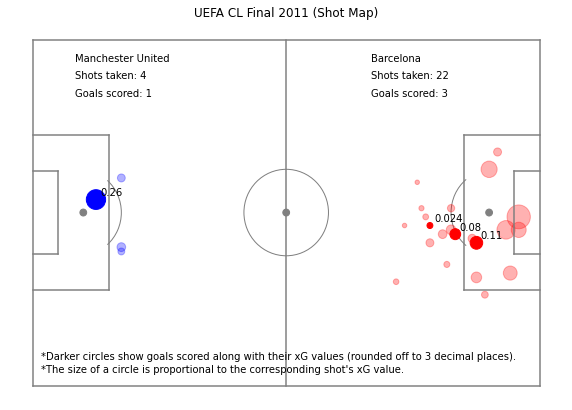

In [50]:
# creating the shot map
(fig, ax) = createPitch(length=pitch_len_x, width=pitch_len_y, unity='yards', linecolor='gray')

home_shots, home_goals, away_shots, away_goals = 0, 0, 0, 0

for i, shot in shots.iterrows():
    # keeping track of the shot location
    x, y = shot['location'][0], shot['location'][1]
    # checks and stores whether the shot got converted into a goal or not
    goal = shot['shot_outcome_name'] == 'Goal'
    # circle radius is proportional to the square root of xG value (that is, circle area is proportional to the xG value)
    circleSize = np.sqrt(shot['shot_statsbomb_xg']*20)
    if shot['team_name'] == home_team:
        home_shots += 1
        if goal:
            home_goals += 1
            shotCircle = plt.Circle(xy=(x, pitch_len_y-y), radius=circleSize, color='red')
            plt.text(x=x+1, y=pitch_len_y-y+1, s=str(round(shot['shot_statsbomb_xg'], 3)))
        else:
            shotCircle = plt.Circle(xy=(x, pitch_len_y-y), radius=circleSize, color='red')
            shotCircle.set_alpha(0.3)
    else:
        away_shots += 1
        if goal:
            away_goals += 1
            shotCircle = plt.Circle(xy=(pitch_len_x-x, y), radius=circleSize, color='blue')
            plt.text(x=pitch_len_x-x+1, y=y+1, s=str(round(shot['shot_statsbomb_xg'], 3)))
        else:
            shotCircle = plt.Circle(xy=(pitch_len_x-x, y), radius=circleSize, color='blue')
            shotCircle.set_alpha(0.3)
    ax.add_patch(shotCircle)

fig.set_size_inches(10, 7)
plt.title(label=match + ' (Shot Map)', loc='center')
plt.text(x=10, y=75, s=away_team)
plt.text(x=80, y=75, s=home_team)
plt.text(x=10, y=71, s='Shots taken: ' + str(away_shots))
plt.text(x=80, y=71, s='Shots taken: ' + str(home_shots))
plt.text(x=10, y=67, s='Goals scored: ' + str(away_goals))
plt.text(x=80, y=67, s='Goals scored: ' + str(home_goals))
plt.text(x=2, y=6, s='*Darker circles show goals scored along with their xG values (rounded off to 3 decimal places).')
plt.text(x=2, y=3, s="*The size of a circle is proportional to the corresponding shot's xG value.")
plt.show()

### Pass map